In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import manufacturing as mn

In [84]:
# raw1 = pd.read_csv('ApproachS70_FFP_ASSY.csv',usecols=['ProcessType','JobNO','Result','ItemNameType','failitem','Item89','Item115','Item78','Item11','Item58','Item50'])

In [85]:
# raw1.to_excel('tweak_ApprochS70_FFP_ASSY.xlsx',index=False)

In [86]:
raw = pd.read_excel('tweak_ApprochS70_FFP_ASSY.xlsx')

In [87]:
plt.style.use('fivethirtyeight')

def

In [88]:
def tweak_df(df,itemnametype, item, lower):    
    return(df
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','JobNO']]
    .astype({'JobNO':'category'})
    .sort_values('JobNO', ascending=False)
    )

In [89]:
def ppk_df(df,itemnametype, item):    
    return(df
    .query(f"ItemNameType=={itemnametype} and Result==True")
    [f'Item{item}']
    )

In [90]:
def my_hisplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.histplot(data = (df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}']])
    ,x=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    )
    )

In [91]:
def my_stripplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.stripplot(data = (df
    .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','Vendor']])
    ,x='Vendor'
    ,y=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    ,dodge=True
    )
    )

In [92]:
# ALS 校驗完後電壓值不正常(修改測試程式)，且這次沒有Golden sample calibration，還有治具設計問題(有環境光進入)

# FT1 L1

ppk

In [93]:
mn.calc_pp(ppk_df(raw,16521,89), upper_specification_limit=1.5, lower_specification_limit=-2.5)

c:\Users\wangcooper\Miniconda3\envs\workspace3.10\lib\site-packages\manufacturing\util.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


0.9985598578022336

In [94]:
mn.calc_ppk(ppk_df(raw,16521,89), upper_specification_limit=1.5, lower_specification_limit=-2.5)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


0.9916134553198628

In [95]:
mn.suggest_specification_limits(ppk_df(raw,16521,89))

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-3.0175183894310136, 1.9896927065614483)

sns

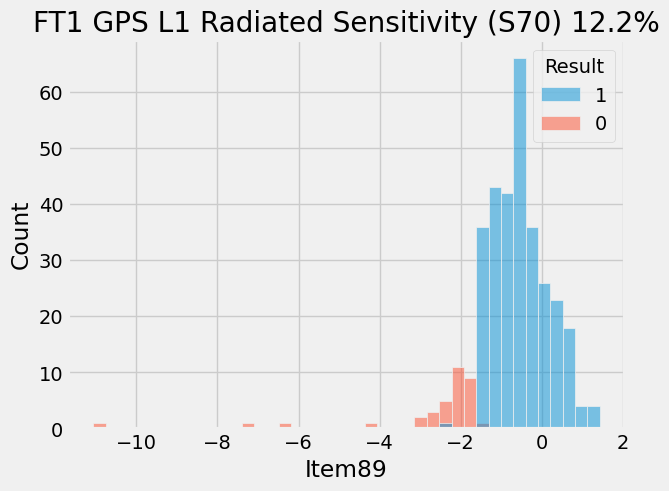

In [96]:
plt.title('FT1 GPS L1 Radiated Sensitivity (S70) 12.2%')
sns.histplot(data=tweak_df(raw,16521,89,-20), x='Item89',hue='Result', hue_order=[1,0], alpha=0.5);

In [97]:
# 會放到±2.5 db

# FT1 L5

ppk

In [98]:
mn.calc_pp(ppk_df(raw,16521,115), upper_specification_limit=1.5, lower_specification_limit=-2.5)

c:\Users\wangcooper\Miniconda3\envs\workspace3.10\lib\site-packages\manufacturing\util.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


0.9931662070388414

In [99]:
mn.calc_ppk(ppk_df(raw,16521,115), upper_specification_limit=1.5, lower_specification_limit=-2.5)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits


0.263022963559768

In [100]:
mn.suggest_specification_limits(ppk_df(raw,16521,115))

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(-1.5468675894055983, 3.4875364857266686)

sns

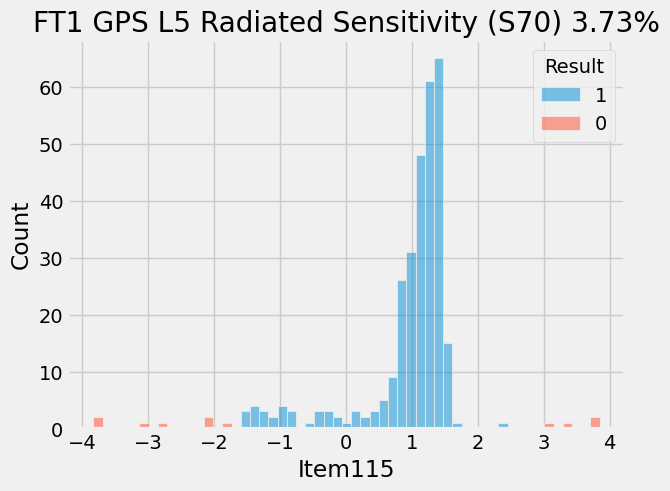

In [101]:
plt.title('FT1 GPS L5 Radiated Sensitivity (S70) 3.73%')
sns.histplot(data=tweak_df(raw,16521,115,-20), x='Item115',hue='Result', hue_order=[1,0], alpha=0.5);

# FT1 L5 BL80%

ppk

sns

In [106]:
mn.calc_pp(ppk_df(raw,16521,78), upper_specification_limit=2.5, lower_specification_limit=-2.5)

c:\Users\wangcooper\Miniconda3\envs\workspace3.10\lib\site-packages\manufacturing\util.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


1.2001472885918187

In [103]:
mn.calc_ppk(ppk_df(raw,16521,78), upper_specification_limit=2.5, lower_specification_limit=-2.5)

1.187832733804529

In [104]:
mn.suggest_specification_limits(ppk_df(raw,16521,78))

(-2.5781948952801783, 2.6294992431062654)

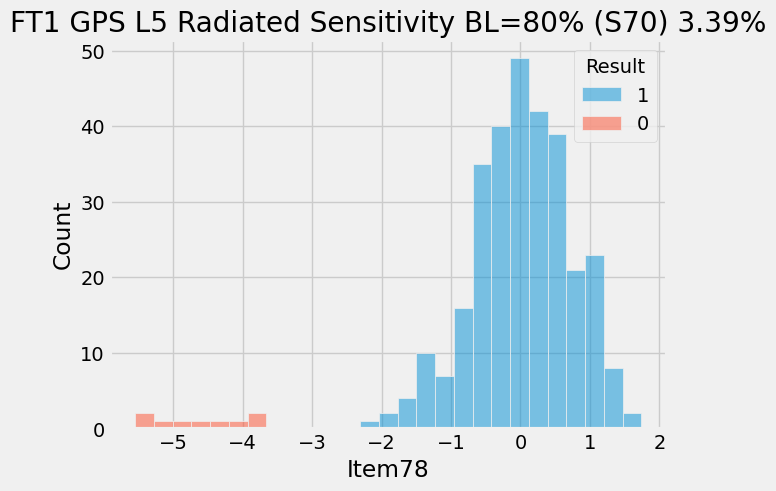

In [105]:
plt.title('FT1 GPS L5 Radiated Sensitivity BL=80% (S70) 3.39%')
sns.histplot(data=tweak_df(raw,16521,78,-20), x='Item78',hue='Result', hue_order=[1,0], alpha=0.5);